<a href="https://www.kaggle.com/code/aniruddhapa/advanced-regression-predict-sales?scriptVersionId=198655870" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Introduction**

## **Why This Project?**
This project is part of the "How to Win a Data Science Competition" Coursera course, and it presents a real-world challenge of predicting sales for one of Russia's largest software firms, 1C Company. Accurate sales forecasting is a critical aspect of retail operations, helping businesses optimize inventory, reduce overstock and understock situations, and improve customer satisfaction. The ability to predict future sales empowers businesses to plan better, minimize wastage, and maximize profits.

In this competition, we are tasked with forecasting the total sales for each product in every store for the upcoming month. Given the dynamic nature of product availability, pricing fluctuations, and store-specific trends, this problem mirrors the complex forecasting issues faced by retail companies worldwide.

## **Real-Life Problem Solved**
Sales forecasting is a fundamental problem for any retail chain, as it directly impacts supply chain management, operational efficiency, and profitability. Retailers need to handle large volumes of sales data across numerous stores and products, all while accounting for seasonal variations, promotional periods, and demand fluctuations. By developing a robust forecasting model, companies can ensure they maintain optimal stock levels, reducing the costs associated with both overstock and stockouts. The insights gained from this model can be extended to other industries reliant on accurate demand prediction, such as manufacturing, e-commerce, and supply chain management.

## **Strategies to Solve the Problem**
1. **Feature Engineering**: A key part of this project involves creating meaningful features from historical sales data, such as monthly sales aggregates, lag-based features (e.g., previous month sales), and price trends. We will also explore combining supplemental data such as item categories and shop information to enrich our predictions.
   
2. **Handling Time Series Data**: Since the dataset consists of daily sales data from January 2013 to October 2015, we need to model temporal dependencies effectively. Strategies such as using **rolling windows** or **lag features** will help capture past trends, while features like the **date_block_num** will be used to track time progression.

3. **Dealing with Data Sparsity**: In real-world retail settings, not every product is sold in every shop every month. This leads to sparse data, which can introduce noise into predictions. Techniques like **data aggregation** and **missing data imputation** will help mitigate these challenges.

4. **Modeling Approach**: For this problem, we will experiment with both traditional machine learning models and advanced algorithms. Some potential models include:
   - **Gradient Boosting Machines (GBM)**: XGBoost or LightGBM, which are well-suited for tabular data and can handle large datasets efficiently.
   - **Neural Networks for Time Series**: Potentially exploring recurrent neural networks (RNN) or LSTMs to capture time dependencies in the sales data.
   - **Ensembling**: Combining predictions from multiple models to create a more accurate and robust forecast.
   

5. **Evaluation Metric**: The competition uses Root Mean Squared Error (RMSE) as the evaluation metric, which penalizes larger errors more heavily. As the target values are clipped between 0 and 20, our model needs to focus on predicting values within this range accurately, avoiding extreme predictions.

## **Roadmap to Success**
- **Data Exploration and Preprocessing**: Initial exploratory data analysis (EDA) will help uncover key patterns in the data. Handling missing values, outliers, and understanding the distribution of target variables will form the foundation of the project.
- **Feature Engineering**: Creating time-related features, capturing shop and item-level characteristics, and analyzing sales trends over time will be the core strategies to improve model performance.
- **Modeling and Hyperparameter Tuning**: Experimenting with various machine learning algorithms, tuning hyperparameters, and leveraging cross-validation techniques will be crucial for model improvement.
- **Final Submission**: We will predict the monthly sales for November 2015, ensuring the submission file follows the required format: `ID,item_cnt_month`.


In [1]:
import pandas as pd
import os

# Function to load multiple CSV files
def load_data(file_paths):
    data = {}
    for name, path in file_paths.items():
        data[name] = pd.read_csv(path)
    return data

# Define file paths in a dictionary
file_paths = {
    'sales_data': '/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv',
    'item_cat': '/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv',
    'items': '/kaggle/input/competitive-data-science-predict-future-sales/items.csv',
    'shops': '/kaggle/input/competitive-data-science-predict-future-sales/shops.csv',
    'test':'/kaggle/input/competitive-data-science-predict-future-sales/test.csv'
}

# Load the data
data = load_data(file_paths)

# Access each dataset by its key
sales_data = data['sales_data']
item_categories = data['item_cat']
items = data['items']
shops = data['shops']
test_data=data['test']


In [2]:
# Import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Basic information about datasets
print("Sales Data Info:\n")
print(sales_data.info())
print("\nTest Data Info:\n")
print(test_data.info())
print("\nItems Info:\n")
print(items.info())
print("\nItem Categories Info:\n")
print(item_categories.info())
print("\nShops Info:\n")
print(shops.info())

Sales Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None

Test Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None

Items Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 

In [3]:
# Check for missing values
print("\nMissing Values in Sales Data:\n", sales_data.isnull().sum())
print("\nMissing Values in Test Data:\n", test_data.isnull().sum())


Missing Values in Sales Data:
 date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

Missing Values in Test Data:
 ID         0
shop_id    0
item_id    0
dtype: int64


In [4]:
# Date parsing and feature extraction

sales_data['date'] = pd.to_datetime(sales_data['date'], format='%d.%m.%Y')
sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month

In [5]:
sales_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
0,2013-01-02,0,59,22154,999.00,1.0,2013,1
1,2013-01-03,0,25,2552,899.00,1.0,2013,1
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1


In [6]:
# Grouping by 'date', 'shop_id', and 'item_id' to get the total number of items sold
grouped_sales = sales_data.groupby(['date', 'shop_id', 'item_id']).agg({'item_cnt_day': 'sum'}).reset_index()

# Renaming the 'item_cnt_day' column to 'total_items_sold' for clarity
grouped_sales.rename(columns={'item_cnt_day': 'total_items_sold'}, inplace=True)

# Display the result
print(grouped_sales.head(10))  # Display the first few rows to check the result

        date  shop_id  item_id  total_items_sold
0 2013-01-01        2      991               1.0
1 2013-01-01        2     1472               1.0
2 2013-01-01        2     1905               1.0
3 2013-01-01        2     2920               2.0
4 2013-01-01        2     3320               1.0
5 2013-01-01        2     4464               1.0
6 2013-01-01        2     4724               1.0
7 2013-01-01        2     5649               1.0
8 2013-01-01        2     6911               1.0
9 2013-01-01        2     6916               1.0


# Time Series Plot for Total Items Sold by Date

This shows how the total number of items sold changes over time.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


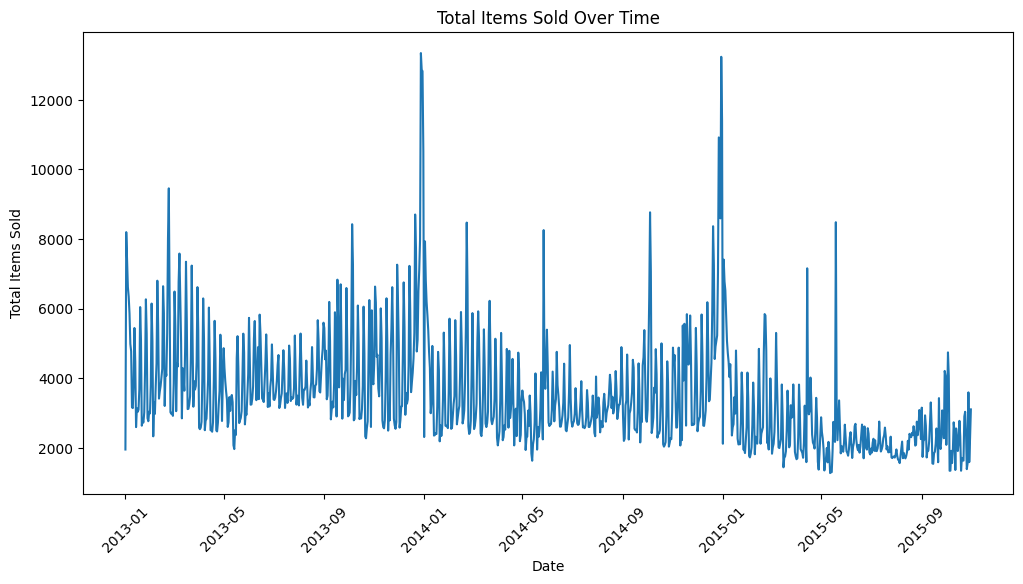

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'date' to get total items sold across all shops and items for each date
datewise_sales = grouped_sales.groupby('date')['total_items_sold'].sum().reset_index()

# Convert 'date' to datetime format for better plotting
datewise_sales['date'] = pd.to_datetime(datewise_sales['date'], format='%d.%m.%Y')

# Plot the total items sold over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_items_sold', data=datewise_sales)
plt.title('Total Items Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Items Sold')
plt.xticks(rotation=45)
plt.show()


# Bar Plot for Total Items Sold by Shop

This shows how many total items were sold in each shop.

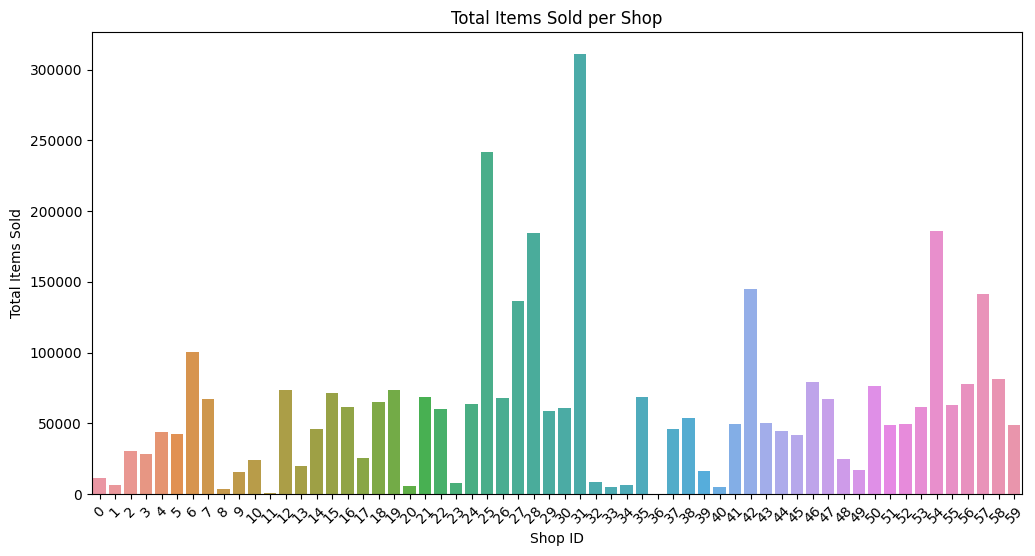

In [8]:
# Group by 'shop_id' to get total items sold for each shop
shopwise_sales = grouped_sales.groupby('shop_id')['total_items_sold'].sum().reset_index()

# Plot total items sold per shop
plt.figure(figsize=(12, 6))
sns.barplot(x='shop_id', y='total_items_sold', data=shopwise_sales)
plt.title('Total Items Sold per Shop')
plt.xlabel('Shop ID')
plt.ylabel('Total Items Sold')
plt.xticks(rotation=45)
plt.show()


In [9]:
# Count the number of unique shop_ids
num_shops = sales_data['shop_id'].nunique()

# Display the result
print(f'Total number of unique shops: {num_shops}')

Total number of unique shops: 60


# Monthly sales trend

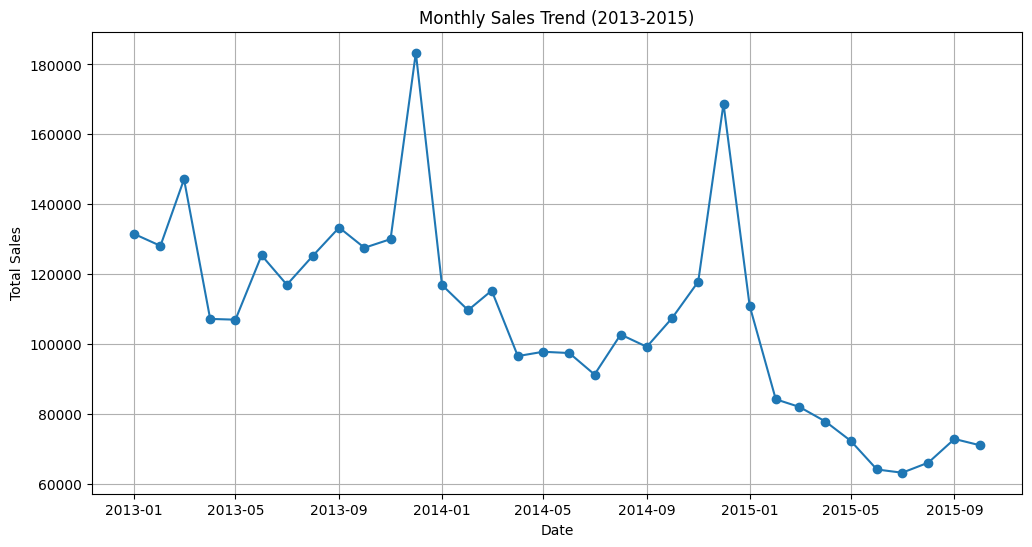

In [10]:
monthly_sales = sales_data.groupby(['year', 'month']).agg({'item_cnt_day': 'sum'}).reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['date'], monthly_sales['item_cnt_day'], marker='o')
plt.title('Monthly Sales Trend (2013-2015)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# Top 10 selling items

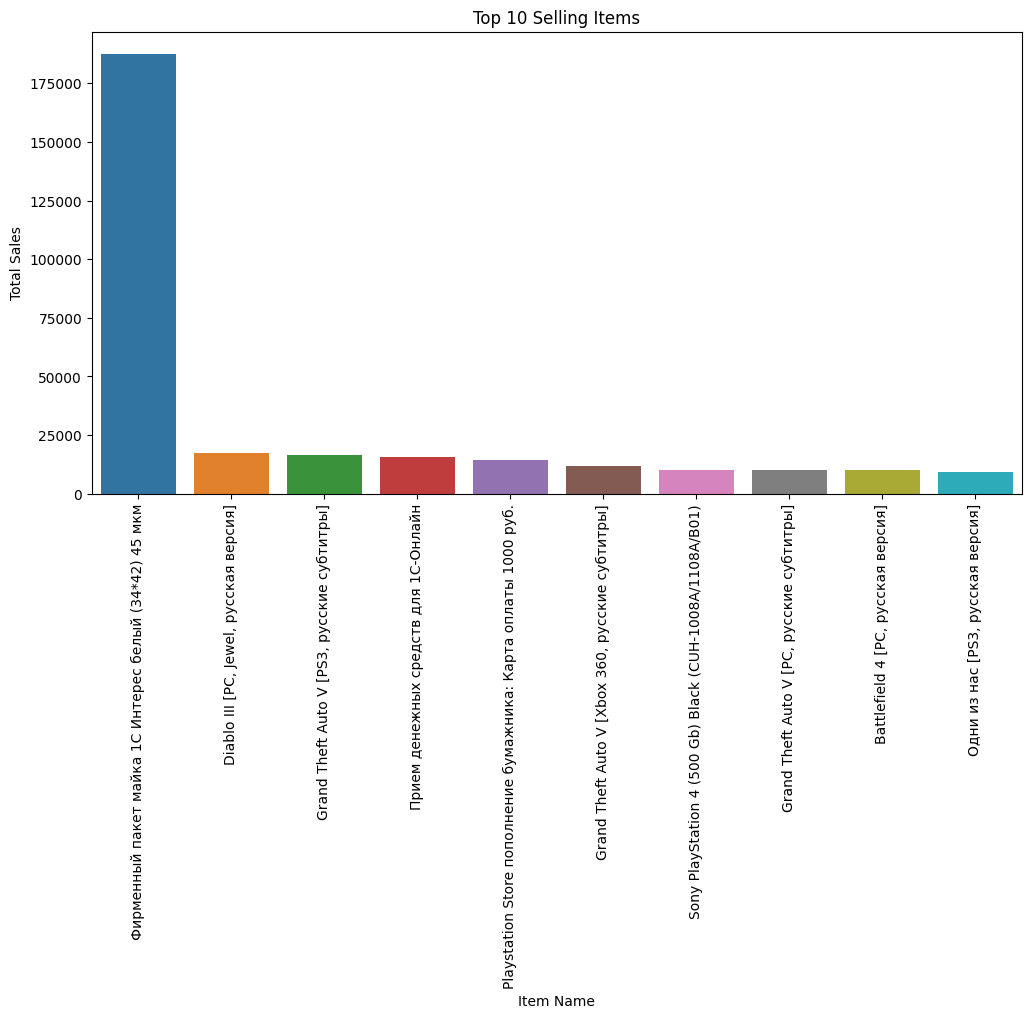

In [11]:
top_items = sales_data.groupby('item_id').agg({'item_cnt_day': 'sum'}).sort_values(by='item_cnt_day', ascending=False).head(10)
top_items = top_items.merge(items[['item_id', 'item_name']], on='item_id')

plt.figure(figsize=(12, 6))
sns.barplot(x='item_name', y='item_cnt_day', data=top_items)
plt.xticks(rotation=90)
plt.title('Top 10 Selling Items')
plt.xlabel('Item Name')
plt.ylabel('Total Sales')
plt.show()

# Top 10 selling shops

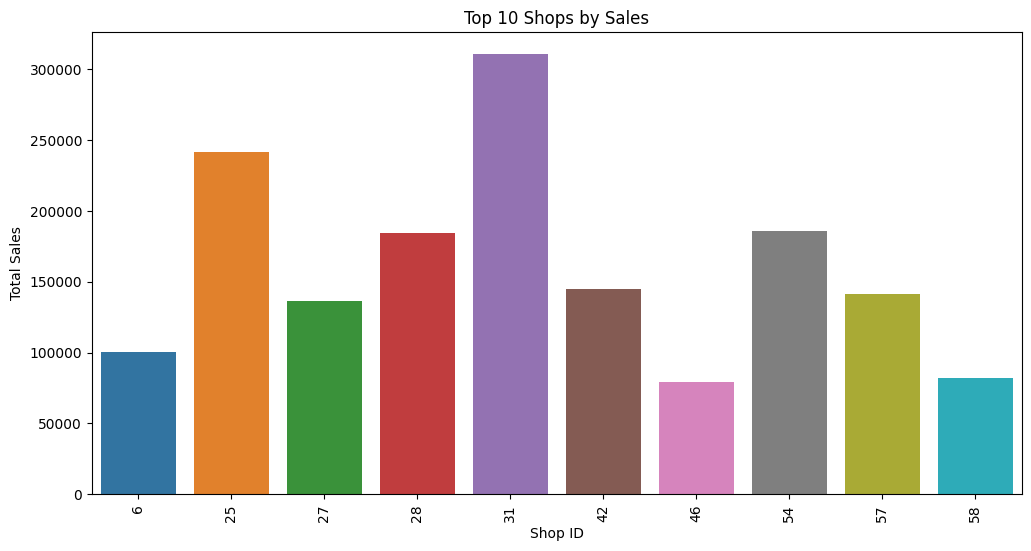

In [12]:
top_shops = sales_data.groupby('shop_id').agg({'item_cnt_day': 'sum'}).sort_values(by='item_cnt_day', ascending=False).head(10)
top_shops = top_shops.merge(shops[['shop_id', 'shop_name']], on='shop_id')

plt.figure(figsize=(12, 6))
sns.barplot(x='shop_id', y='item_cnt_day', data=top_shops)
plt.xticks(rotation=90)
plt.title('Top 10 Shops by Sales')
plt.xlabel('Shop ID')
plt.ylabel('Total Sales')
plt.show()

In [13]:
test_data.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# Reshape the data to analyse Total Sales over time

Lets see and analyze total sales shop-wise,item-wise over time. For that we need to reshape the data.The `pivot_table` function allows us to summarize and organize the sales data by transforming it into a more accessible format. 

By grouping the data based on `shop_id` and `item_id`, and distributing it across different months (`date_block_num`), we can easily observe sales trends for each product-shop combination over time. This pivot table helps us in visualizing the sales patterns and preparing the data for future time-series analysis and forecasting.

The `fill_value=0` ensures that any missing values are replaced with `0`, indicating that no sales occurred for a specific product-shop combination during certain months. The `reset_index()` function is used to convert the pivoted data back into a standard DataFrame format with default integer indexing for easier manipulation in subsequent steps.

In [14]:
# Ensure shop_id and item_id are present in the pivot table
dataset = sales_data.pivot_table(index=['shop_id', 'item_id'], values='item_cnt_day', 
                                 columns='date_block_num', fill_value=0, aggfunc='sum').reset_index()

# Flatten the multi-level columns in the dataset
dataset.columns = ['_'.join(map(str, col)) if isinstance(col, tuple) else col for col in dataset.columns]

# Merge with test_data
merged_data = pd.merge(test_data, dataset, on=['item_id', 'shop_id'], how='left')

# Display the merged dataset
print(merged_data.head())


   ID  shop_id  item_id    0    1    2    3    4    5    6  ...   24   25  \
0   0        5     5037  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1   1        5     5320  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2   2        5     5233  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3   3        5     5232  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4   4        5     5268  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

    26   27   28   29   30   31   32   33  
0  0.0  0.0  1.0  1.0  1.0  3.0  1.0  0.0  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  0.0  0.0  3.0  2.0  0.0  1.0  3.0  1.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 37 columns]


# Purpose of the Merge

The reason for merging the test data with the dataset is to incorporate historical sales data from the training period into the test dataset. This allows the model to make predictions for each shop_id and item_id combination in the test data based on past sales patterns.

### Key Points:

* Left join ensures that all rows from test_data are preserved, even if there’s no corresponding historical data for the specific shop_id and item_id.

* Historical features such as past sales from the dataset are now included in the test_data, making it ready for prediction.

### Parameters used:

* on=['item_id', 'shop_id']: This tells the merge() function to combine the two DataFrames based on the common columns item_id and shop_id.

* how='left': This specifies a left join, meaning:

    *     All rows from the test_data will be retained.

    *     Only matching rows from dataset will be included. If there's no match for a particular item_id and shop_id in dataset, those values will be set to NaN.
    
**This ensures that your model is trained on historical data relevant to the combinations it needs to predict in the test set. The result is a more focused dataset that contains only the historical sales information necessary for making predictions for the specified shop_id and item_id pairs in the test data.**

In [15]:
merged_data.head()

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
merged_data.fillna(0,inplace=True)
merged_data.head()

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
merged_data.drop(['shop_id','item_id','ID'],axis=1,inplace=True)
merged_data.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Why Drop These Columns:

- **Redundancy**: Once the data is merged, the `shop_id`, `item_id`, and `ID` columns no longer add value to the model, as their purpose was primarily organizational or structural.
  
- **Focus on Predictive Features**: The goal is to focus on features that help in making predictions (such as historical sales, prices, or other aggregated features). Columns that don't contribute to the model's learning are removed to avoid clutter.
  
- **Model Efficiency**: By removing unnecessary columns, the dataset becomes cleaner, and this can improve model training efficiency and reduce memory usage.


In [18]:
import numpy as np
X_train=np.expand_dims(merged_data.values[:,:-1],axis=2)

*merged_data.values[:, :-1] selects all rows and all columns except the last one from the merged_data dataframe.*

the date_block_num starts at 0, which represents January 2013, and each subsequent date_block_num increases by one month.

Thus, to find out which month and year date_block_num = 33 corresponds to, you can calculate it like this:

    * Month 0 = January 2013
    * Month 33 = 34th month after January 2013.

To calculate:

    * 34 months from January 2013 = November 2015.

**So, column 33 in merged_data corresponds to November 2015, for which we need to make the prediction.
Column 33 is out Target column, hence removed that column from X_train.**

In [19]:
len(X_train[0])

33

# Why Use `np.expand_dims` for Training Data?

The code `X_train = np.expand_dims(merged_data.values[:, :-1], axis=2)` is used to reshape the data into a format suitable for machine learning models, particularly those dealing with sequences, such as Recurrent Neural Networks (RNNs) or Convolutional Neural Networks (CNNs). Let's break down why this transformation is necessary:

#### 1. Reshaping the Input:
- `merged_data.values[:, :-1]` selects all rows and columns except the last one from the `merged_data` dataframe. This helps extract the feature columns used for training while excluding the target variable (often the last column).
  
#### 2. Adding an Extra Dimension:
- `np.expand_dims(..., axis=2)` introduces a new dimension at the third axis (`axis=2`). This operation transforms a 2D array (rows and columns) into a 3D array (rows, columns, and depth).

#### 3. Why Add an Extra Dimension?
- **Sequential/Time-Series Data**: Certain models (e.g., RNNs, LSTMs, CNNs) expect input data in a 3D format, where each "depth" layer corresponds to either a sequence step or a feature map. Expanding the dimension allows the model to interpret each feature vector as part of a sequence.
- **Shape for Model Input**: Adding this extra dimension makes the data compatible with models that expect input in the format `(samples, timesteps, features)`. Without this adjustment, the model might not correctly interpret the structure of the input data.

#### Summary:
This transformation prepares the data for models requiring 3D input by adding an extra dimension, enabling the model to process the data correctly, especially for tasks like time-series forecasting or sequence modeling.


In [20]:
y_train=merged_data.values[:,-1:]

In [21]:
X_test=np.expand_dims(merged_data.values[:,1:],axis = 2)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from sklearn.metrics  import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.layers import Dense,Dropout,LSTM,RepeatVector,TimeDistributed,Flatten

In [23]:
'''import tensorflow as tf
from tensorflow.keras.layers import Input

# Initialize the model
model_lstm = tf.keras.Sequential()

# Add an Input layer to specify the input shape
model_lstm.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Add LSTM layer
model_lstm.add(tf.keras.layers.LSTM(units=64))

# Add Dropout layer
model_lstm.add(tf.keras.layers.Dropout(0.4))

# Add Dense layer
model_lstm.add(tf.keras.layers.Dense(1))

# Compile the model
model_lstm.compile(loss='mse', optimizer='SGD', metrics=['mean_squared_error'])

# Display the model summary
model_lstm.summary()'''


"import tensorflow as tf\nfrom tensorflow.keras.layers import Input\n\n# Initialize the model\nmodel_lstm = tf.keras.Sequential()\n\n# Add an Input layer to specify the input shape\nmodel_lstm.add(Input(shape=(X_train.shape[1], X_train.shape[2])))\n\n# Add LSTM layer\nmodel_lstm.add(tf.keras.layers.LSTM(units=64))\n\n# Add Dropout layer\nmodel_lstm.add(tf.keras.layers.Dropout(0.4))\n\n# Add Dense layer\nmodel_lstm.add(tf.keras.layers.Dense(1))\n\n# Compile the model\nmodel_lstm.compile(loss='mse', optimizer='SGD', metrics=['mean_squared_error'])\n\n# Display the model summary\nmodel_lstm.summary()"

In [24]:
X_train.shape[2]

1

In [25]:
'''history_lstm=model_lstm.fit(X_train,y_train,batch_size=4096,epochs=20)'''

'history_lstm=model_lstm.fit(X_train,y_train,batch_size=4096,epochs=20)'

In [26]:
'''import matplotlib.pyplot as plt
plt.plot(history_lstm.history['loss'],color='b',label="Training Loss")
plt.legend(loc='best',shadow=True)'''

'import matplotlib.pyplot as plt\nplt.plot(history_lstm.history[\'loss\'],color=\'b\',label="Training Loss")\nplt.legend(loc=\'best\',shadow=True)'

In [27]:
'''submission_pfs=model_lstm.predict(X_test)
submission_pfs=submission_pfs.clip(0,20)
submission=pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
submission.to_csv('submission.csv',index=False)'''


"submission_pfs=model_lstm.predict(X_test)\nsubmission_pfs=submission_pfs.clip(0,20)\nsubmission=pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})\nsubmission.to_csv('submission.csv',index=False)"

In [28]:
'''final=pd.read_csv('submission.csv')
final.head()'''

"final=pd.read_csv('submission.csv')\nfinal.head()"

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input

# Initialize the model
model_lstm = tf.keras.Sequential()

# Add an Input layer to specify the input shape
model_lstm.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Add LSTM layer with 128 units
model_lstm.add(tf.keras.layers.LSTM(units=128))

# Add Dropout layer with a dropout rate of 0.2
model_lstm.add(tf.keras.layers.Dropout(0.2))

# Add Dense layer for output
model_lstm.add(tf.keras.layers.Dense(1))

# Compile the model with Adam optimizer and learning rate of 0.001
model_lstm.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['mean_squared_error'])

# Display the model summary
model_lstm.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history_lstm=model_lstm.fit(X_train,y_train,batch_size=4096,epochs=20)

Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 8.2713 - mean_squared_error: 8.2713
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 85.1416 - mean_squared_error: 85.1416
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 44.4640 - mean_squared_error: 44.4640
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 8.8428 - mean_squared_error: 8.8428
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 33.8961 - mean_squared_error: 33.8961
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 50.9330 - mean_squared_error: 50.9330
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 13.4329 - mean_squared_error: 13.4329
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 39.1714 - mean_squared_error: 39.1714
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 74.3372 - mean_squared_error: 74.3372
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 6.1019 - mean_squared_error: 6.1019
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━

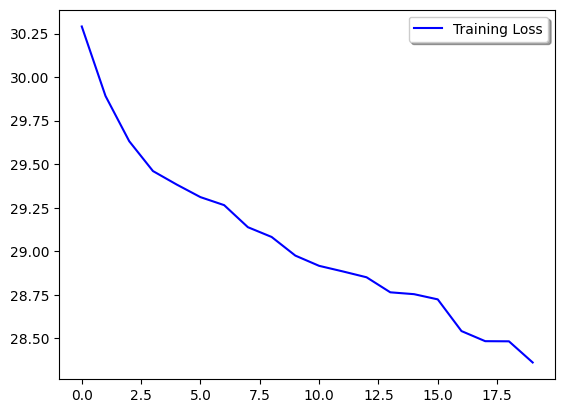

In [31]:
import matplotlib.pyplot as plt
plt.plot(history_lstm.history['loss'],color='b',label="Training Loss")
plt.legend(loc='best',shadow=True)

In [32]:
submission_pfs=model_lstm.predict(X_test)
submission_pfs=submission_pfs.clip(0,20)
submission=pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
submission.to_csv('submission.csv',index=False)


6694/6694 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


# Hyperparameter tuning

In [33]:
'''import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid

# Prepare your data (make sure to replace these with your actual data)
# X_train, y_train = ...

# Define hyperparameters to tune
param_grid = {
    'units': [32, 64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4, 0.5],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Store the best model and lowest MSE
best_model = None
lowest_mse = float('inf')

# Loop through all combinations of hyperparameters
for params in ParameterGrid(param_grid):
    print(f'Testing parameters: {params}')
    
    # Initialize the model
    model_lstm = Sequential()
    
    # Input layer
    model_lstm.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

    # LSTM layer with variable units
    model_lstm.add(LSTM(units=params['units'], return_sequences=True))
    model_lstm.add(Dropout(params['dropout_rate']))
    
    # Add another LSTM layer
    model_lstm.add(LSTM(units=params['units'] // 2))  # Half the units for the second layer
    model_lstm.add(Dropout(params['dropout_rate']))
    
    # Dense output layer
    model_lstm.add(Dense(1))

    # Compile the model with variable learning rate
    model_lstm.compile(loss='mse', optimizer=Adam(learning_rate=params['learning_rate']), metrics=['mean_squared_error'])

    # Train the model
    model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model
    mse = model_lstm.evaluate(X_train, y_train, verbose=0)[0]
    print(f'MSE for parameters {params}: {mse}')
    
    # Check if this model is the best one
    if mse < lowest_mse:
        lowest_mse = mse
        best_model = model_lstm

print(f'Best model parameters: {best_model.layers}')
print(f'Lowest MSE achieved: {lowest_mse}')
'''

"import numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.layers import Input\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM, Dropout, Dense\nfrom tensorflow.keras.optimizers import Adam\nfrom sklearn.model_selection import ParameterGrid\n\n# Prepare your data (make sure to replace these with your actual data)\n# X_train, y_train = ...\n\n# Define hyperparameters to tune\nparam_grid = {\n    'units': [32, 64, 128, 256],\n    'dropout_rate': [0.2, 0.3, 0.4, 0.5],\n    'learning_rate': [0.001, 0.01, 0.1]\n}\n\n# Store the best model and lowest MSE\nbest_model = None\nlowest_mse = float('inf')\n\n# Loop through all combinations of hyperparameters\nfor params in ParameterGrid(param_grid):\n    print(f'Testing parameters: {params}')\n    \n    # Initialize the model\n    model_lstm = Sequential()\n    \n    # Input layer\n    model_lstm.add(Input(shape=(X_train.shape[1], X_train.shape[2])))\n\n    # LSTM layer with variable units\n    mod

In [34]:
'''#2nd model Multilayer Perceptron
adam=optimizers.Adam()

model_mlp=tf.keras.Sequential()
model_mlp.add(tf.keras.layers.Dense(100,activation='relu',input_dim=X_train.shape[1]))
model_mlp.add(tf.keras.layers.Dropout(0.4))
model_mlp.add(tf.keras.layers.Dense(1))

model_mlp.compile(loss='mse',optimizer='adam',metrics=['mean_squared_error'])
model_mlp.summary()'''

"#2nd model Multilayer Perceptron\nadam=optimizers.Adam()\n\nmodel_mlp=tf.keras.Sequential()\nmodel_mlp.add(tf.keras.layers.Dense(100,activation='relu',input_dim=X_train.shape[1]))\nmodel_mlp.add(tf.keras.layers.Dropout(0.4))\nmodel_mlp.add(tf.keras.layers.Dense(1))\n\nmodel_mlp.compile(loss='mse',optimizer='adam',metrics=['mean_squared_error'])\nmodel_mlp.summary()"

In [35]:
'''history_mlp=model_mlp.fit(X_train,y_train,batch_size=4096,epochs=20)'''

'history_mlp=model_mlp.fit(X_train,y_train,batch_size=4096,epochs=20)'

In [36]:
'''plt.plot(history_mlp.history['loss'],color='b',label='Training Loss')
plt.legend(loc='best',shadow=True)'''

"plt.plot(history_mlp.history['loss'],color='b',label='Training Loss')\nplt.legend(loc='best',shadow=True)"

In [37]:
'''submission_pfs=model_mlp.predict(X_test)
submission_pfs=submission_pfs.clip(0,20)
submission=pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
submission.to_csv('submission.csv',index=False)'''

"submission_pfs=model_mlp.predict(X_test)\nsubmission_pfs=submission_pfs.clip(0,20)\nsubmission=pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})\nsubmission.to_csv('submission.csv',index=False)"

In [38]:
'''final=pd.read_csv('submission.csv')
final.head()'''

"final=pd.read_csv('submission.csv')\nfinal.head()"

# CNN

In [39]:
'''adam=optimizers.Adam()
model_cnn=tf.keras.Sequential()
model_cnn.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(150,activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse',optimizer=adam)
model_cnn.summary()'''

"adam=optimizers.Adam()\nmodel_cnn=tf.keras.Sequential()\nmodel_cnn.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))\nmodel_cnn.add(MaxPooling1D(pool_size=2))\nmodel_cnn.add(Flatten())\nmodel_cnn.add(Dense(150,activation='relu'))\nmodel_cnn.add(Dense(1))\nmodel_cnn.compile(loss='mse',optimizer=adam)\nmodel_cnn.summary()"

In [40]:
'''cnn_history=model_cnn.fit(X_train,y_train,epochs=20,verbose=2)
'''

'cnn_history=model_cnn.fit(X_train,y_train,epochs=20,verbose=2)\n'

In [41]:
'''plt.plot(cnn_history.history['loss'],color='b',label='Training Loss')
plt.legend(loc='best',shadow=True)'''

"plt.plot(cnn_history.history['loss'],color='b',label='Training Loss')\nplt.legend(loc='best',shadow=True)"

In [42]:
'''submission_pfs=model_cnn.predict(X_test)
submission_pfs=submission_pfs.clip(0,20)
submission=pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
submission.to_csv('submission.csv',index=False)'''

"submission_pfs=model_cnn.predict(X_test)\nsubmission_pfs=submission_pfs.clip(0,20)\nsubmission=pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})\nsubmission.to_csv('submission.csv',index=False)"